## Fetch Stakeholder Repository

In [ ]:
#import os

#if os.path.exists('./stakeholder') is True:
#    os.system('rm -rf ./stakeholder/')

#!git clone https://github.com/casangi/stakeholder.git

## Certify and install required python modules.

In [1]:
import os
import sys
import subprocess
import pkg_resources

__require = {'casatools', 'casatasks', 'casatestutils', 'panel', 'astropy', 'matplotlib', 'numpy'}
__installed = {pkg.key for pkg in pkg_resources.working_set}
    
__missing = __require - __installed


if len(__missing) > 0:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', *__missing], stdout=subprocess.DEVNULL)

In [ ]:
!python3 -m casatools --update-user-data

## Utility Functions

In [2]:
def clean_data():
    import os
    
    os.system('rm -rf standard_cube* *.log *.png *.html')

## Stakeholder Datasets

```
Datasets (MOUS)
E2E6.1.00034.S (uid://A002/Xcff05c/X1ec)
2018.1.00879.S (uid://A001/X133d/X169f)
E2E6.1.00020.S (uid://A002/Xcff05c/Xe5)
2017.1.00750.T (uid://A001/X131b/X57)

Test list - 22 total
1a.  Single field(SF) cube with perchanweightdensity=False(pcwdF), weighting=briggs - E2E6.1.00034.S
1b.  SF cube with pcwdT, weighting=briggs - E2E6.1.00034.S
1c.  SF cube with pcwdT, weighting=briggsbwtaper - E2E6.1.00034.S
2.   SF MFS - E2E6.1.00020.S
3.   SF mtmfs - E2E6.1.00020.S
4a.  SF ephemeris cube (multi-EB) with pcwdF+briggs - 2017.1.00750.T
4b.  SF ephemeris cube (multi-EB) with pcwdT+briggs - 2017.1.00750.T
4c.  SF ephemeris cube (multi-EB) with pcwdT+briggsbwtaper - 2017.1.00750.T
5.   SF ephemeris MFS - 2018.1.00879.S
6.   SF ephemeris mtmfs - 2018.1.00879.S
7.   SF Calibrator - E2E6.1.00034.S
8.   SF ephemeris Calibrator - 2018.1.00879.S
9a.  Mosaic cube with pcwdF, briggs- E2E6.1.00034.S
9b.  Mosaic cube with pcwdT+brigs- E2E6.1.00034.S
9c.  Mosaic cube with pcwdT+briggsbwtaper- E2E6.1.00034.S
10.  Mosaic MFS - E2E6.1.00020.S
11.  Mosaic mtmfs - E2E6.1.00020.S
12a. Mosaic ephemeris cube with pcwdF- 2018.1.00879.S
12b. Mosaic ephemeris cube with pcwdT+briggs - 2018.1.00879.S
12c. Mosaic ephemeris cube with pcwdT+briggsbwtaper - 2018.1.00879.S
13.  Mosaic ephemeris MFS - 2018.1.00879.S
14.  Mosaic ephemeris mtmfs - 2018.1.00879.S

Each test stores reference values in dictionaries for the metrics
to be tested and these dictionaries are stored in a single nested dictionary
in a json file located in the casatestdata repository. 
The path of json file is stored in the variable, 
       self.expdict_jsonfile  
in test_tclean_base.setUp(). 

* NOTE for updating the tests and fiducial values in json file *
When the json file is updated and its 'casa_version'
could also be updated then self.refversion in the setUp() needs to be updated to
match with the 'casa_version' as defined in the json file otherwise 
almastkteestutils.read_testcase_expdicts() print an error message.

The fudicial metric values for a specific image are stored with the following keys.
 
For the standard tests, default sets are:
    exp_im_stats, exp_mask_stats, exp_pb_stats, exp_psf_stats,
    exp_model_stats, exp_resid_stats, exp_sumwt_stats
For mosaic tests, the ones above and
    exp_wt_stats (for mosaic)
Additionally, for cube imaging (if self.parallel=True),
    exp_bmin_dict, exp_bmaj_dict, exp_pa_dict
And for mtmfs
    exp_im1_stats, exp_model1_stats, exp_resid1_stats, exp_sumwt1_stats
```

## Stakeholder Modular Test Breakdown

Load the stakeholder test as a module. The `Test_standard()` class has been modularized into the following general pieces:



*   `tclean_base.set_file_path()` : This is a new method in the base class that is used to set the stakeholder data path in a way that is accesible when running in modular mode.
*   `tclean_base.prepData()` | `tclean_base.getExpdicts()`: Both of these functions are traditionally called when the test class is instantiated.
*   `tclean_base.setUp()`: This method is normally called with the test class instantiation but due to needing to set the data path in colab manually, for modular operation, it is called separately.
*   `Test_standard.test_standard_cube()`: This is the standard cube test method. A check is done to determine whether the method is being called as a part of the standard unittest suite or modular by the user. The `inspect` module is used to determine the method that called standard cube test.
*   `tclean_base.clean()`: For standard operation the tclean tests are called in the normal way using the method `Test_standard.standard_cube_clean()` but for modular operation a tclean wrapper function has been added to the base class allowing the user to call tclean with their choice of input parameters.
*   `Test_standard.standard_cube_report()`: This method contains the code to generate the user test reports and moment plots. It is called in both use cases.

## Load Stakeholder Data

In [4]:
!wget -r -np -nH --cut-dirs=4 --reject "index.html*" https://www.cv.nrao.edu/~jhoskins/E2E6.1.00034.S_tclean.ms.tar
!tar -xvf E2E6.1.00034.S_tclean.ms.tar
os.system('mv E2E6.1.00034.S_tclean.ms data/')

!wget -r -np -nH --cut-dirs=4 --reject "index.html*" https://www.cv.nrao.edu/~jhoskins/test_stk_alma_pipeline_imaging_exp_dicts.json
os.system('cp test_stk_alma_pipeline_imaging_exp_dicts.json ./data/')    

--2021-12-16 15:20:16--  https://www.cv.nrao.edu/~jhoskins/E2E6.1.00034.S_tclean.ms.tar
Resolving www.cv.nrao.edu (www.cv.nrao.edu)... 192.33.115.129
Connecting to www.cv.nrao.edu (www.cv.nrao.edu)|192.33.115.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195870720 (187M) [application/x-tar]
Saving to: ‘E2E6.1.00034.S_tclean.ms.tar’

E2E6.1.00034.S_tcle 100%[===================>] 186.80M   111MB/s    in 1.7s    

2021-12-16 15:20:19 (111 MB/s) - ‘E2E6.1.00034.S_tclean.ms.tar’ saved [195870720/195870720]

FINISHED --2021-12-16 15:20:19--
Total wall clock time: 3.1s
Downloaded: 1 files, 187M in 1.7s (111 MB/s)
E2E6.1.00034.S_tclean.ms/
E2E6.1.00034.S_tclean.ms/ANTENNA/
E2E6.1.00034.S_tclean.ms/ANTENNA/table.dat
E2E6.1.00034.S_tclean.ms/ANTENNA/table.f0
E2E6.1.00034.S_tclean.ms/ANTENNA/table.info
E2E6.1.00034.S_tclean.ms/ANTENNA/table.lock
E2E6.1.00034.S_tclean.ms/ASDM_ANTENNA/
E2E6.1.00034.S_tclean.ms/ASDM_ANTENNA/table.dat
E2E6.1.00034.S_tclean.ms/ASDM_ANT

--2021-12-16 15:20:20--  https://www.cv.nrao.edu/~jhoskins/test_stk_alma_pipeline_imaging_exp_dicts.json
Resolving www.cv.nrao.edu (www.cv.nrao.edu)... 192.33.115.129
Connecting to www.cv.nrao.edu (www.cv.nrao.edu)|192.33.115.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 726297 (709K) [application/json]
Saving to: ‘test_stk_alma_pipeline_imaging_exp_dicts.json’

test_stk_alma_pipel 100%[===================>] 709.27K  --.-KB/s    in 0.007s  

2021-12-16 15:20:20 (106 MB/s) - ‘test_stk_alma_pipeline_imaging_exp_dicts.json’ saved [726297/726297]

FINISHED --2021-12-16 15:20:20--
Total wall clock time: 0.06s
Downloaded: 1 files, 709K in 0.007s (106 MB/s)


0

## Enable mpi

In [5]:
parallel = True

## Import Required Dependencies

In [6]:
import casatasks
import casatools
import panel as pn

from astropy.io import fits
from astropy.wcs import WCS

import pylab as pl
import numpy as np

import nb1.test_standard_cube_briggsbwtaper as stk
import stk_utils.stats_table as stk_table

pn.extension('tabulator')

## Modular Test Suite

In [7]:
standard = stk.Test_standard()

In [8]:
standard.set_file_path(path=os.getcwd()+"/data/")

Setting data_path: /export/home/fornax/jhoskins/Development/stakeholder/data/


In [9]:
standard.setUp()

In [10]:
standard.test_standard_cube_briggsbwtaper()

In [13]:
msfile = standard.data_path + 'E2E6.1.00034.S_tclean.ms'

casatasks.tclean(vis=msfile, 
                 imagename=standard.file_name+'0', 
                 field='1',
                 spw=['0'], 
                 imsize=[80, 80], 
                 antenna=['0,1,2,3,4,5,6,7,8'], 
                 scan=['8,12,16'], 
                 intent='OBSERVE_TARGET#ON_SOURCE',
                 datacolumn='data', 
                 cell=['1.1arcsec'], 
                 phasecenter='ICRS 00:45:54.3836 -073.15.29.413', 
                 stokes='I', 
                 specmode='cube',
                 nchan=508, 
                 start='220.2526743594GHz', 
                 width='0.2441741MHz',
                 outframe='LSRK', 
                 pblimit=0.2, 
                 perchanweightdensity=True,
                 gridder='standard', 
                 mosweight=False,
                 deconvolver='hogbom', 
                 usepointing=False, 
                 restoration=False,
                 pbcor=False, 
                 weighting='briggsbwtaper', 
                 restoringbeam='common',
                 robust=0.5, npixels=0, 
                 niter=0, 
                 threshold='0.0mJy', 
                 nsigma=0.0,
                 interactive=0, 
                 usemask='auto-multithresh',
                 sidelobethreshold=1.25, 
                 noisethreshold=5.0,
                 lownoisethreshold=2.0, 
                 negativethreshold=0.0, 
                 minbeamfrac=0.1,
                 growiterations=75, 
                 dogrowprune=True, 
                 minpercentchange=1.0,
                 fastnoise=False, 
                 savemodel='none', 
                 parallel=parallel,
                 verbose=True)

print('Copying iter0 files to iter1')
standard.copy_products(standard.file_name+'0', standard.file_name+'1')

Copying iter0 files to iter1


In [14]:
casatasks.imstat(standard.file_name + '0.psf')

{'blc': array([0, 0, 0, 0]),
 'blcf': '00:46:04.574, -73.16.13.397, I, 2.202527e+11Hz',
 'max': array([1.]),
 'maxpos': array([40, 40,  0,  0]),
 'maxposf': '00:45:54.384, -73.15.29.413, I, 2.202527e+11Hz',
 'mean': array([0.00213068]),
 'medabsdevmed': array([0.06809951]),
 'median': array([-0.03720173]),
 'min': array([-0.20378327]),
 'minpos': array([  7,  13,   0, 473]),
 'minposf': '00:46:02.789, -73.15.59.102, I, 2.203682e+11Hz',
 'npts': array([3251200.]),
 'q1': array([-0.09263814]),
 'q3': array([0.06073105]),
 'quartile': array([0.15336919]),
 'rms': array([0.13685789]),
 'sigma': array([0.13684132]),
 'sum': array([6927.26572989]),
 'sumsq': array([60895.2410615]),
 'trc': array([ 79,  79,   0, 507]),
 'trcf': '00:45:44.462, -73.14.46.498, I, 2.203765e+11Hz'}

In [15]:
casatasks.tclean(vis=msfile, 
                 imagename=standard.file_name+'1', 
                 field='1',
                 spw=['0'], 
                 imsize=[80, 80], 
                 antenna=['0,1,2,3,4,5,6,7,8'],
                 scan=['8,12,16'], 
                 intent='OBSERVE_TARGET#ON_SOURCE',
                 datacolumn='data', 
                 cell=['1.1arcsec'], 
                 phasecenter='ICRS 00:45:54.3836 -073.15.29.413', 
                 stokes='I', 
                 specmode='cube',
                 nchan=508, 
                 start='220.2526743594GHz', 
                 width='0.2441741MHz',
                 outframe='LSRK', 
                 perchanweightdensity=True,
                 usepointing=False, 
                 pblimit=0.2, 
                 nsigma=0.0,
                 gridder='standard', 
                 mosweight=False, 
                 deconvolver='hogbom', 
                 restoration=True, 
                 restoringbeam='common', 
                 pbcor=True, 
                 weighting='briggsbwtaper', 
                 robust=0.5, 
                 npixels=0, 
                 niter=20000,
                 threshold='0.354Jy', 
                 interactive=0, 
                 usemask='auto-multithresh', 
                 sidelobethreshold=1.25, 
                 noisethreshold=5.0, 
                 lownoisethreshold=2.0, 
                 negativethreshold=0.0,
                 minbeamfrac=0.08, 
                 growiterations=75, 
                 dogrowprune=True,
                 minpercentchange=1.0, 
                 fastnoise=False, 
                 restart=True, 
                 calcres=False, 
                 calcpsf=False, 
                 savemodel='none',
                 parallel=parallel, 
                 verbose=True)

{'cleanstate': 'running',
 'cyclefactor': 1.0,
 'cycleiterdone': 0,
 'cycleniter': 20000,
 'cyclethreshold': 0.1810014843940735,
 'interactiveiterdone': 19,
 'interactivemode': False,
 'interactiveniter': 0,
 'interactivethreshold': 0.0,
 'iterdone': 32,
 'loopgain': 0.10000000149011612,
 'maxpsffraction': 0.800000011920929,
 'maxpsfsidelobe': 0.509247362613678,
 'minpsffraction': 0.05000000074505806,
 'niter': 20000,
 'nmajordone': 2,
 'nsigma': 0.0,
 'stopcode': 2,
 'summarymajor': array([15, 32]),
 'summaryminor': array([[  9.        ,  24.        ,  25.        ,  42.        ],
        [  0.51566607,   0.49087879,   0.35147971,   0.35124114],
        [  0.65050554,   0.43279624,   1.6620127 ,   1.08244705],
        [  0.51891911,   0.51891911,   0.354     ,   0.354     ],
        [  0.        ,   0.        ,   0.        ,   0.        ],
        [254.        , 256.        , 254.        , 256.        ]]),
 'threshold': 0.3540000021457672}

## Produce Standard Cube Report

pstr after checkims = [ check_ims ] Image made : ['/export/home/fornax/jhoskins/Development/stakeholder/standard_cube_briggsbwtaper.iter1.psf', '/export/home/fornax/jhoskins/Development/stakeholder/standard_cube_briggsbwtaper.iter1.residual', '/export/home/fornax/jhoskins/Development/stakeholder/standard_cube_briggsbwtaper.iter1.image', '/export/home/fornax/jhoskins/Development/stakeholder/standard_cube_briggsbwtaper.iter1.image.pbcor', '/export/home/fornax/jhoskins/Development/stakeholder/standard_cube_briggsbwtaper.iter1.mask', '/export/home/fornax/jhoskins/Development/stakeholder/standard_cube_briggsbwtaper.iter1.pb', '/export/home/fornax/jhoskins/Development/stakeholder/standard_cube_briggsbwtaper.iter1.model', '/export/home/fornax/jhoskins/Development/stakeholder/standard_cube_briggsbwtaper.iter1.sumwt'] =  [True, True, True, True, True, True, True, True] ( Pass : should all be True )

pstr after check_keywords = [ check_ims ] Image made : ['/export/home/fornax/jhoskins/Developmen

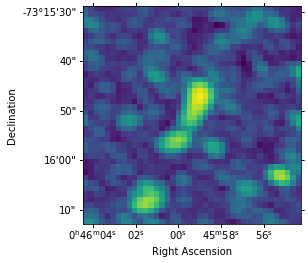

In [16]:
standard.standard_cube_report()

In [ ]:
table = stk_table.StatsTable(
    json_expected='data/test_stk_alma_pipeline_imaging_exp_dicts.json', 
    json_measured='test_standard_cube_briggsbwtaper_cur_stats_6.3.0.48.json',
    stakeholder_test='test_standard_cube_briggsbwtaper'
)

table.stats_table()

In [ ]:
table.json_measured

## Clean Data
Uncomment this if you want to clean the working files out of the directory.

In [17]:
clean_data()